In [38]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.interpolate as interp
import scipy.optimize as opt
import scipy.special as sf

Best Fit Whole:
a1 = -0.01352018161952379 +/- 0.004047807092013864
a2 = 1.9567172721290995 +/- 0.476817620995798
a3 = -86.9893435123734 +/- 15.163236256319323
a4 = 1220.4379015804188 +/- 117.06223245267306
chisq = 1809.904795493948
dof = 3
goodness of fit = 0.0


(0, 1400)

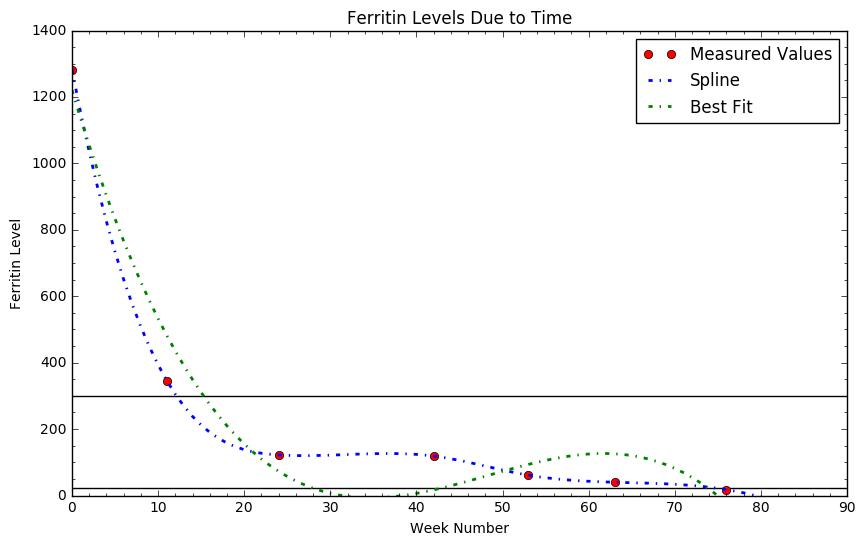

In [114]:
num = np.linspace(0, 90, 91)
ferritin = np.array([1282, 346.2, 122.2, 118.7, 61.2, 39.9, 17.7])
weeknum = np.array([0, 11, 24, 42, 53, 63, 76])
sigma_y = 5

def ymodel(x, a1, a2, a3, a4):
    return a1*x**3 + a2 * x**2 + a3 * x + a4

(p0, C) = opt.curve_fit(ymodel, weeknum, ferritin, sigma=sigma_y)
sigma_p = np.sqrt(np.diag(C))
chisq = np.sum((ferritin - ymodel(weeknum,*p0))**2/sigma_y**2)
dof = len(ferritin) - len(p0)
Q = sf.gammaincc(0.5*dof, 0.5*chisq)
print("""Best Fit Whole:
a1 = {} +/- {}
a2 = {} +/- {}
a3 = {} +/- {}
a4 = {} +/- {}
chisq = {}
dof = {}
goodness of fit = {}""".format(p0[0], sigma_p[0], p0[1], sigma_p[1], p0[2], sigma_p[2], p0[3], sigma_p[3],
                               chisq, dof, Q))





yspline = interp.InterpolatedUnivariateSpline(weeknum, ferritin)

fig = plt.figure(figsize = [10, 6])
ax = fig.add_subplot(111)
ax.axhline(24, color='k')
ax.axhline(300, color='k')
ax.plot(weeknum, ferritin, 'ro', label='Measured Values')
ax.plot(num, yspline(num), 'b-.', lw=2, label='Spline')
ax.plot(num, ymodel(num, *p0), 'g-.', lw=2, label='Best Fit')
ax.minorticks_on()
ax.legend(loc='best')
ax.set_xlabel('Week Number')
ax.set_ylabel('Ferritin Level')
ax.set_title('Ferritin Levels Due to Time')
ax.set_xlim(0,90)
ax.set_ylim(0, 1400)





In [105]:
def ymodel2(x, a1, a2):
    return a1*x + a2
sigma_y = 5.0
halfferritin = np.log10(ferritin[0:3])
halfweeknum = weeknum[0:3]
half2ferritin = np.log10(ferritin[3:])
half2weeknum = weeknum[3:]

(p, C) = opt.curve_fit(ymodel2, weeknum, logdata, sigma=sigma_y)
sigma_p = np.sqrt(np.diag(C))
chisq = np.sum((logdata - ymodel2(weeknum,*p))**2/sigma_y**2)
dof = len(ferritin) - len(p)
Q = sf.gammaincc(0.5*dof, 0.5*chisq)
print("""Best Fit Whole:
a1 = {} +/- {}
a2 = {} +/- {}
chisq = {}
dof = {}
goodness of fit = {}""".format(p[0], sigma_p[0], p[1], sigma_p[1],
                               chisq, dof, Q))



(p2, C) = opt.curve_fit(ymodel2, halfweeknum, halfferritin, sigma=sigma_y)
sigma_p = np.sqrt(np.diag(C))
chisq = np.sum((halfferritin - ymodel2(halfweeknum,*p2))**2/sigma_y**2)
dof = len(halfferritin) - len(p2)
Q = sf.gammaincc(0.5*dof, 0.5*chisq)
print("""
Best Fit First Half:
a1 = {} +/- {}
a2 = {} +/- {}
chisq = {}
dof = {}
goodness of fit = {}""".format(p2[0], sigma_p[0], p2[1], sigma_p[1],
                               chisq, dof, Q))


(p3, C) = opt.curve_fit(ymodel2, half2weeknum, half2ferritin, sigma=sigma_y)
sigma_p = np.sqrt(np.diag(C))
chisq = np.sum((half2ferritin - ymodel2(half2weeknum,*p3))**2/sigma_y**2)
dof = len(half2ferritin) - len(p3)
Q = sf.gammaincc(0.5*dof, 0.5*chisq)
print("""
Best Fit Second Half:
a1 = {} +/- {}
a2 = {} +/- {}
chisq = {}
dof = {}
goodness of fit = {}""".format(p3[0], sigma_p[0], p3[1], sigma_p[1],
                               chisq, dof, Q))




Best Fit Whole:
a1 = -0.021276345168995056 +/- 0.0025819334242070838
a2 = 2.8811102068910124 +/- 0.11958003880945385
chisq = 0.006236684424007455
dof = 5
goodness of fit = 0.9999998369705815

Best Fit First Half:
a1 = -0.04230150156444868 +/- 0.00483309795635578
a2 = 3.071612950012662 +/- 0.07366841960111686
chisq = 0.000269716685923374
dof = 1
goodness of fit = 0.986896888203344

Best Fit Second Half:
a1 = -0.02386591334223976 +/- 0.0011236682552792732
a2 = 3.073693006308198 +/- 0.06722786108357985
chisq = 6.353556169989323e-05
dof = 2
goodness of fit = 0.9999682327237407


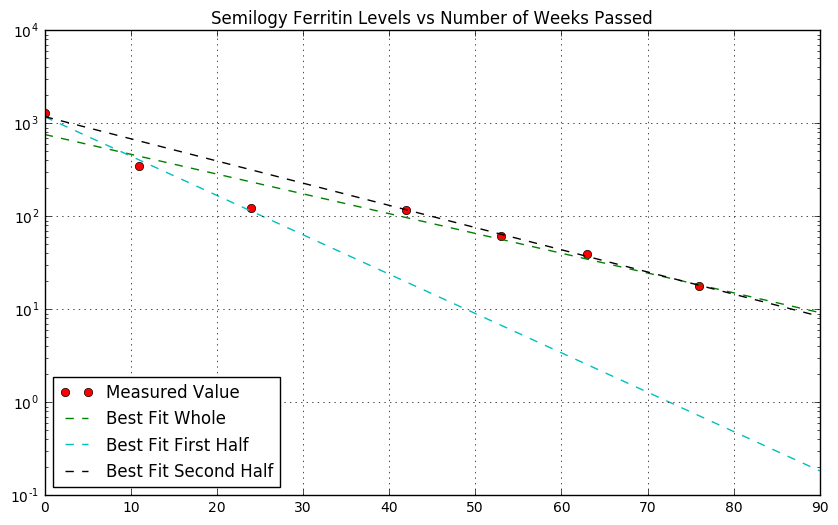

In [100]:
fig2, ax = plt.subplots(1, 1, figsize = (10, 6))
ax.semilogy(weeknum, ferritin, 'ro', label= 'Measured Value')
ax.set_title('Semilogy Ferritin Levels vs Number of Weeks Passed')
ax.grid(True)
logdata = np.log10(ferritin)
ax.semilogy(num, 10**ymodel2(num, *p), 'g--', label='Best Fit Whole')
ax.semilogy(num, 10**ymodel2(num, *p2), 'c--', label='Best Fit First Half')
ax.semilogy(num, 10**ymodel2(num, *p3), 'k--', label='Best Fit Second Half')
ax.legend(loc = 'lower left')

In [109]:
numphleb = np.array([0, 7, 17, 21, 24, 26, 29])
halfnumphleb = numphleb[0:3]
half2numphleb = numphleb[3:]

(p4, C) = opt.curve_fit(ymodel2, numphleb, logdata, sigma=sigma_y)
sigma_p = np.sqrt(np.diag(C))
chisq = np.sum((logdata - ymodel2(numphleb,*p4))**2/sigma_y**2)
dof = len(ferritin) - len(p4)
Q = sf.gammaincc(0.5*dof, 0.5*chisq)
print("""Best Fit Whole:
a1 = {} +/- {}
a2 = {} +/- {}
chisq = {}
dof = {}
goodness of fit = {}""".format(p4[0], sigma_p[0], p4[1], sigma_p[1],
                               chisq, dof, Q))

(p5, C) = opt.curve_fit(ymodel2, halfnumphleb, halfferritin, sigma=sigma_y)
sigma_p = np.sqrt(np.diag(C))
chisq = np.sum((halfferritin - ymodel2(halfnumphleb,*p5))**2/sigma_y**2)
dof = len(halfferritin) - len(p5)
Q = sf.gammaincc(0.5*dof, 0.5*chisq)
print("""
Best Fit First Half:
a1 = {} +/- {}
a2 = {} +/- {}
chisq = {}
dof = {}
goodness of fit = {}""".format(p5[0], sigma_p[0], p5[1], sigma_p[1],
                               chisq, dof, Q))

(p6, C) = opt.curve_fit(ymodel2, half2numphleb, half2ferritin, sigma=sigma_y)
sigma_p = np.sqrt(np.diag(C))
chisq = np.sum((half2ferritin - ymodel2(half2numphleb,*p6))**2/sigma_y**2)
dof = len(half2ferritin) - len(p6)
Q = sf.gammaincc(0.5*dof, 0.5*chisq)
print("""
Best Fit Second Half:
a1 = {} +/- {}
a2 = {} +/- {}
chisq = {}
dof = {}
goodness of fit = {}""".format(p6[0], sigma_p[0], p6[1], sigma_p[1],
                               chisq, dof, Q))


Best Fit Whole:
a1 = -0.056786644660720725 +/- 0.005314066454251363
a2 = 3.0694255049386467 +/- 0.10763912987585322
chisq = 0.0038147262772411845
dof = 5
goodness of fit = 0.9999999522563512

Best Fit First Half:
a1 = -0.05903281111790271 +/- 0.009964506305286596
a2 = 3.050357920482463 +/- 0.10576781258508555
chisq = 0.0005798617207710682
dof = 1
goodness of fit = 0.9807885426353822

Best Fit Second Half:
a1 = -0.10269671565007257 +/- 0.00432235794786437
a2 = 4.244954967038767 +/- 0.10879126816280273
chisq = 5.081715495231739e-05
dof = 2
goodness of fit = 0.999974591745319


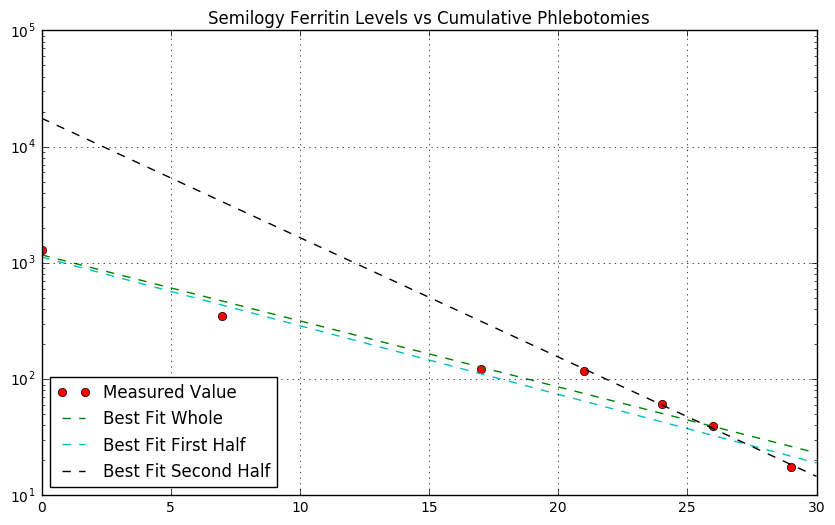

In [113]:
totalphleb = np.linspace(0, 30, 500)

fig3, ax = plt.subplots(1, 1, figsize = (10, 6))
ax.semilogy(numphleb, ferritin, 'ro', label= 'Measured Value')
ax.set_title('Semilogy Ferritin Levels vs Cumulative Phlebotomies')
ax.grid(True)
logdata = np.log10(ferritin)
ax.semilogy(totalphleb, 10**ymodel2(totalphleb, *p4), 'g--', label='Best Fit Whole')
ax.semilogy(totalphleb, 10**ymodel2(totalphleb, *p5), 'c--', label='Best Fit First Half')
ax.semilogy(totalphleb, 10**ymodel2(totalphleb, *p6), 'k--', label='Best Fit Second Half')
ax.legend(loc = 'lower left')